In [1]:
#This Supernova Cosmology project program
#Free for all kinds of use, change and redistribution
#Copyleft (Though I don't really know what it means)
#Created by Shibo Chen, October 31, 2016 @ University of Michigan
#Multi-contributors as shown in the list below

In [2]:
%matplotlib inline
from pylab import *
import numpy as np
import scipy.integrate as spInt

#import some constant here
HUBBLE_CONSTANT=67.6
SPEED_OF_LIGHT=299792.458

In [3]:
# Here we define some methods 

#First, let's define a function for H
def func_Hubble(redshift,omegaM,omegaDarkEnergy=None):
    if(omegaDarkEnergy==None):
        omegaDarkEnergy=1-omegaM
    return HUBBLE_CONSTANT*np.sqrt(omegaM*np.power(1+redshift,3)+\
                                   (1-omegaM-omegaDarkEnergy)*np.power(1+redshift,2)+\
                                   omegaDarkEnergy)

#For convenience we need a c/H function
def func_Hdividec(redshift,omegaM,omegaDarkEnergy=None):
    return SPEED_OF_LIGHT/func_Hubble(redshift,omegaM,omegaDarkEnergy)

#Then, let's do some  integration
def comovingDistance(redshift,omegaM,omegaDarkEnergy=None):
    r,e=spInt.quad(func_Hdividec,0,redshift,args=(omegaM,omegaDarkEnergy))
    return r

#Last this is for luminosity distance
def luminosityDistance(redshift,omegaM,omegaDarkEnergy=None):
    return (1+redshift)*comovingDistance(redshift,omegaM,omegaDarkEnergy)

In [4]:
#I don't know much about jupyter so let's use it as a web-based python :)
#first, let's create a class

class Supernova():
    
    #init the supernova
    def __init__(self,redshift,magnitude,errinMagnitude):
        self.redshift=redshift
        self.magnitude=magnitude
        self.errinMagnitude=errinMagnitude
        
    #This function will return the computed magnitude.
    #if you don't give Omage DE, it will assume it is a flat universe
    #And I really hate python, why I can't declare something as const
    
    #here, if Mr is not indicated, we would use the value of vega
    def computedMagnitude(self,omegaM,Mr=0.03,omegaDarkEnergy=None):
        return Mr+5*np.log10(luminosityDistance(self.redshift,omegaM,omegaDarkEnergy)*1e5)
    
    #I don't know what is going on here on Jupyter so I created a getter method explicitly
    def getAttribute(self,attr):
        if attr=="redshift":
            return self.redshift
        elif attr=="magnitude":
            return self.magnitude;
        elif attr=="errinMagnitude":
            return self.errinMagnitude
        else:
            return "no attribute "+attr+" found in supernova"
        
        

#Then we create a empty list to store supernovas
supernovas=[]

#Open the file 
dataFile=open('SupernovaData','r')

#read in the data line by line and push the supernovas into our list
for line in dataFile:
    datas=line.split()
    
    redshift=float(datas[1])
    magnitude=float(datas[2])
    errinMagnitude=float(datas[3])
    
    supernova=Supernova(redshift,magnitude,errinMagnitude)
    supernovas.append(supernova)
    
dataFile.close()

In [5]:
#Let's estimate Mr first
Mr=0
SampleVolume=0
for SN in supernovas:
    #we choose those redshift<0.02
    if SN.getAttribute("redshift")<0.02:
        distance=SPEED_OF_LIGHT*SN.getAttribute("redshift")/HUBBLE_CONSTANT
        Mr+=SN.getAttribute("magnitude")-5*np.log10(distance*1e5)
        SampleVolume+=1
    else:
        pass

Mr/=SampleVolume

In [6]:
#Let's then define some other methods
def chiSquared(omegaM,Mr=0.03,omegaDarkEnergy=None):
    chiSquare=0.0
    for obj in supernovas:
        chiSquare+=np.square(obj.getAttribute("magnitude")-obj.computedMagnitude(omegaM,Mr,omegaDarkEnergy))/\
        np.square(obj.getAttribute("errinMagnitude"))
    return chiSquare
# I don't come up with some better ways now. So here we just leave Mr as a constant
def likelihood(omegaM,omegaDarkEnergy=None):
    return np.exp(-chiSquared(omegaM,Mr,omegaDarkEnergy)/2)

KeyboardInterrupt: 

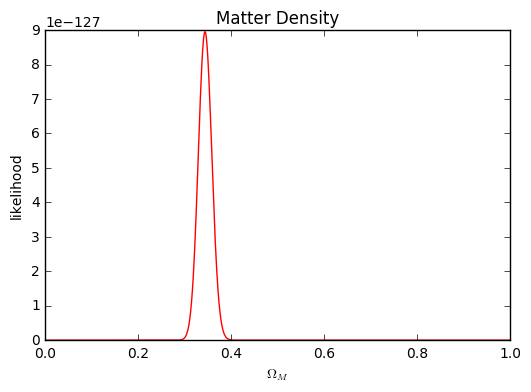

In [ ]:
#Case 1, the universe is flat which means omegaDE+omegaM=1
omegaM=np.linspace(0.0,1,1000)
y=np.vectorize(likelihood)(omegaM)

figure()
plot(omegaM,y,'r')
xlabel(r'$\Omega_M$')
ylabel('likelihood')
title('Matter Density')
show

omegaM=np.linspace(0.3,0.4,1000)
y=np.vectorize(likelihood)(omegaM)

figure()
plot(omegaM,y,'r')
xlabel(r'$\Omega_M$')
ylabel('likelihood')
title('Matter Density')
show

In [ ]:
#Case 2
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt

omegaM=np.linspace(0.1,0.4,100)
omegaDE=np.linspace(0.1,1,100)
X,Y=np.meshgrid(omegaM,omegaDE)
Z=np.vectorize(likelihood)(X,Y)

fig,ax=plt.subplots()
cnt=ax.contour(Z,cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0.1, 0.4, 0.1, 1])

In [ ]:
fig=plt.figure(figsize=(14,6))

ax=fig.add_subplot(1,2,1,projection='3d')
p=ax.plot_surface(X,Y,Z,rstride=4,cstride=4,linewidth=0)